In [1]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
# 使用三阶多项式生产数据集
max_degree = 20  # 多项式的最高阶数
n_train, n_test = 100, 100  # 训练和测试数据集的样本数
true_w = np.zeros(max_degree)  # 真实模型的参数
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])  # 真实模型为3阶多项式

features = np.random.normal(size=(n_train + n_test, 1))  # 输入特征
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))  # 多项式特征
labels = (poly_features @ true_w).reshape(-1, 1)  # 生成标签
labels += np.random.normal(scale=0.1, size=labels.shape)  # 添加噪声

In [3]:
true_w, features, poly_features, labels = [
    torch.tensor(x, dtype=torch.float32) 
    for x in [true_w, features, poly_features, labels]
]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.2884],
         [ 1.1310]]),
 tensor([[ 1.0000e+00, -2.8838e-01,  8.3160e-02, -2.3981e-02,  6.9156e-03,
          -1.9943e-03,  5.7511e-04, -1.6585e-04,  4.7826e-05, -1.3792e-05,
           3.9772e-06, -1.1469e-06,  3.3075e-07, -9.5380e-08,  2.7505e-08,
          -7.9318e-09,  2.2873e-09, -6.5961e-10,  1.9022e-10, -5.4853e-11],
         [ 1.0000e+00,  1.1310e+00,  1.2792e+00,  1.4468e+00,  1.6363e+00,
           1.8507e+00,  2.0932e+00,  2.3674e+00,  2.6776e+00,  3.0284e+00,
           3.4251e+00,  3.8739e+00,  4.3814e+00,  4.9554e+00,  5.6046e+00,
           6.3389e+00,  7.1694e+00,  8.1087e+00,  9.1710e+00,  1.0373e+01]]),
 tensor([[ 4.1461],
         [10.1667]]))

In [4]:
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上的损失"""
    metric = d2l.Accumulator(2)  # 损失总和,样本数量
    for X, y in data_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [5]:
import sys
sys.path.append('..')
import train_ch3

In [6]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)), batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)), batch_size,
                               is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
#     animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
#                             xlim=[1, num_epochs], legend=['train', 'test'])
    
#     train_ch3.train_epoch_ch3(net, train_iter, loss, trainer)
    train_ch3.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
        
    print('weight:', net[0].weight.data.numpy())

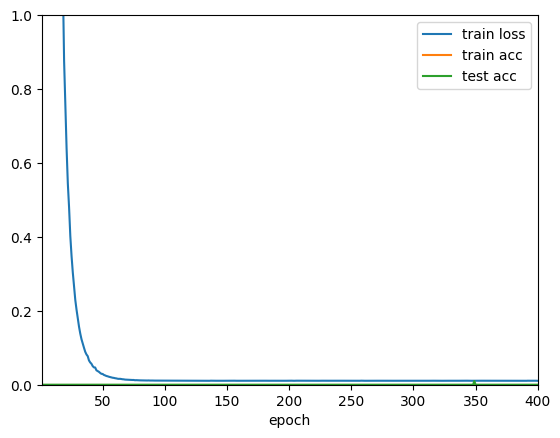

最后一轮训练损失: 0.010652, 训练准确率: 0.000000, 测试准确率: 0.000000
weight: [[ 4.9955606  1.2404156 -3.4090881  5.5953884]]


In [7]:
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

In [8]:
# train(poly_features[:n_train, :2], poly_features[n_train:, :2], 
#       labels[:n_train], labels[n_train:])

In [9]:
# train(poly_features[:n_train,:], poly_features[n_train:, :], 
#       labels[:n_train], labels[n_train:])